# Diallo's Analysis

In [1]:
import os
import yaml

path_to_data = os.path.join( r"C:\Users\lamar\OneDrive\Documents\Zoom\case_junior_en",
    "fake_liste_users_revo_130122.yaml",
)
print("loading data file, wait...")
with open(path_to_data, 'r') as data_file_content:
    users_list = yaml.load(data_file_content, Loader=yaml.FullLoader)
print("data load complete!")

print("Total number of users : ", len(users_list))

loading data file, wait...
data load complete!
Total number of users :  20000


In [2]:
users_list

[{'acquisition_channel': 'phone',
  'cancel_year_month': '2019-07',
  'duration_month': 42,
  'fiber_or_adsl': 'adsl',
  'has_retention': False,
  'offer': '#11:Freebox Revolution with TV 3999eur',
  'recruit_year_month': '2016-01',
  'sub_offer': '11.4:Freebox Revolution with TV 3999eur',
  'total_bill': 1810},
 {'acquisition_channel': 'online',
  'cancel_year_month': '2018-07',
  'duration_month': 18,
  'fiber_or_adsl': 'adsl',
  'has_retention': False,
  'offer': '#11:Freebox Revolution with TV 3999eur',
  'recruit_year_month': '2017-01',
  'sub_offer': '11.4:Freebox Revolution with TV 3999eur',
  'total_bill': 670},
 {'acquisition_channel': 'phone',
  'cancel_year_month': '2018-03',
  'duration_month': 26,
  'fiber_or_adsl': 'adsl',
  'has_retention': False,
  'offer': '#11:Freebox Revolution with TV 3999eur',
  'recruit_year_month': '2016-01',
  'sub_offer': '11.4:Freebox Revolution with TV 3999eur',
  'total_bill': 1030},
 {'acquisition_channel': 'phone',
  'cancel_year_month': '

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.DataFrame(users_list)

data

,acquisition_channel,cancel_year_month,duration_month,fiber_or_adsl,has_retention,offer,recruit_year_month,sub_offer,total_bill
0,phone,2019-07,42,adsl,False,#11:Freebox Revolution with TV 3999eur,2016-01,11.4:Freebox Revolution with TV 3999eur,1810
1,online,2018-07,18,adsl,False,#11:Freebox Revolution with TV 3999eur,2017-01,11.4:Freebox Revolution with TV 3999eur,670
2,phone,2018-03,26,adsl,False,#11:Freebox Revolution with TV 3999eur,2016-01,11.4:Freebox Revolution with TV 3999eur,1030
3,phone,N/A,N/A,fiber,False,#11:Freebox Revolution with TV 3999eur,2017-01,11.4:Freebox Revolution with TV 3999eur,2470
4,phone,2019-02,37,adsl,False,#11:Freebox Revolution with TV 3999eur,2016-01,11.4:Freebox Revolution with TV 3999eur,2060
...,...,...,...,...,...,...,...,...,...
19995,phone,2019-02,37,adsl,False,#11:Freebox Revolution with TV 3999eur,2016-01,11.4:Freebox Revolution with TV 3999eur,1620
19996,phone,N/A,N/A,adsl,False,#8:Freebox Revolution 2999eur,2016-01,8.2:Freebox Revolution 2999eur,3130
19997,online,2017-01,12,adsl,False,#11:Freebox Revolution with TV 3999eur,2016-01,11.4:Freebox Revolution with TV 3999eur,430
19998,outgoing call - promo,2018-04,15,fiber,False,#8:Freebox Revolution 2999eur,2017-01,8.57:Freebox Revolution 2999eur | Promo : 999e...,280


# 1 How many users are there in each cohort initially?

In [4]:
cohort = data.groupby(['recruit_year_month']).count()
cohort


,acquisition_channel,cancel_year_month,duration_month,fiber_or_adsl,has_retention,offer,sub_offer,total_bill
recruit_year_month,,,,,,,,
2016-01,10452,10452,10452,10452,10452,10452,10452,10452
2017-01,9548,9548,9548,9548,9548,9548,9548,9548


In [5]:
i = cohort['offer']
print('The number of users in the cohort',i.index[0],'is :',i[0])
print('The number of users in the cohort',i.index[1],'is :',i[1])

The number of users in the cohort 2016-01 is : 10452
The number of users in the cohort 2017-01 is : 9548


# 2-i How many remain in January 2022 ?

In [6]:
C = data.groupby(['cancel_year_month'])['recruit_year_month'].count()
C

cancel_year_month
2016-01     235
2016-02     216
2016-03     125
2016-04     131
2016-05     149
           ... 
2021-10      62
2021-11      70
2021-12      74
2022-01      29
N/A        6569
Name: recruit_year_month, Length: 74, dtype: int64

In [7]:
print('The total number of users remaining in January 2022 is :',C[-1])

The total number of users remaining in January 2022 is : 6569


In [8]:
data1 = data.loc[(data['recruit_year_month']=='2016-01')]
churned1 = data1.groupby(['cancel_year_month']).count()
churned1

,acquisition_channel,duration_month,fiber_or_adsl,has_retention,offer,recruit_year_month,sub_offer,total_bill
cancel_year_month,,,,,,,,
2016-01,235,235,235,235,235,235,235,235
2016-02,216,216,216,216,216,216,216,216
2016-03,125,125,125,125,125,125,125,125
2016-04,131,131,131,131,131,131,131,131
2016-05,149,149,149,149,149,149,149,149
...,...,...,...,...,...,...,...,...
2021-10,27,27,27,27,27,27,27,27
2021-11,32,32,32,32,32,32,32,32
2021-12,38,38,38,38,38,38,38,38


In [9]:
C1 = churned1['offer']
print('The number of users remaining in January 2022 for',C1.index[0],'is :',C1[-1])

The number of users remaining in January 2022 for 2016-01 is : 3257


In [10]:
data2 = data.loc[(data['recruit_year_month']=='2017-01')]
churned2 = data2.groupby(['cancel_year_month']).count()
churned2

,acquisition_channel,duration_month,fiber_or_adsl,has_retention,offer,recruit_year_month,sub_offer,total_bill
cancel_year_month,,,,,,,,
2017-01,236,236,236,236,236,236,236,236
2017-02,208,208,208,208,208,208,208,208
2017-03,152,152,152,152,152,152,152,152
2017-04,116,116,116,116,116,116,116,116
2017-05,142,142,142,142,142,142,142,142
...,...,...,...,...,...,...,...,...
2021-10,35,35,35,35,35,35,35,35
2021-11,38,38,38,38,38,38,38,38
2021-12,36,36,36,36,36,36,36,36


In [11]:
C2 = churned2['offer']
print('The number of users remaining in January 2022 for',C2.index[0],'is :',C2[-1])

The number of users remaining in January 2022 for 2017-01 is : 3312


# 2-ii How many churned each month ?

# A- For the cohort 2016-01 :

In [12]:
C1[:-1]

cancel_year_month
2016-01    235
2016-02    216
2016-03    125
2016-04    131
2016-05    149
          ... 
2021-09     44
2021-10     27
2021-11     32
2021-12     38
2022-01     14
Name: offer, Length: 73, dtype: int64

In [13]:
print('average number of unsubscribes per month :',C1[:-1].mean())

average number of unsubscribes per month : 98.56164383561644


# B- For the cohort 2017-01 :

In [14]:
C2[:-1]

cancel_year_month
2017-01    236
2017-02    208
2017-03    152
2017-04    116
2017-05    142
          ... 
2021-09     34
2021-10     35
2021-11     38
2021-12     36
2022-01     15
Name: offer, Length: 61, dtype: int64

In [15]:
print('average number of unsubscribes per month :',C2[:-1].mean())

average number of unsubscribes per month : 102.22950819672131


# 2-iii  Plot the share of users remaining as a function of tenure

# A- For the cohort 2016-01 :

In [16]:
x1 = C1
y = x1["cum_sum"]= x1.cumsum() 
z = 10452- y 
z1 = z[:-1]
z1


cancel_year_month
2016-01    10217
2016-02    10001
2016-03     9876
2016-04     9745
2016-05     9596
           ...  
2021-09     3368
2021-10     3341
2021-11     3309
2021-12     3271
2022-01     3257
Name: offer, Length: 73, dtype: int64

In [17]:
duration1 = data1.groupby(['duration_month']).count()
duration1

,acquisition_channel,cancel_year_month,fiber_or_adsl,has_retention,offer,recruit_year_month,sub_offer,total_bill
duration_month,,,,,,,,
0,235,235,235,235,235,235,235,235
1,216,216,216,216,216,216,216,216
2,125,125,125,125,125,125,125,125
3,131,131,131,131,131,131,131,131
4,149,149,149,149,149,149,149,149
...,...,...,...,...,...,...,...,...
69,27,27,27,27,27,27,27,27
70,32,32,32,32,32,32,32,32
71,38,38,38,38,38,38,38,38


Text(0.5, 1.0, 'users remaining as a function of tenure cohort 2016')

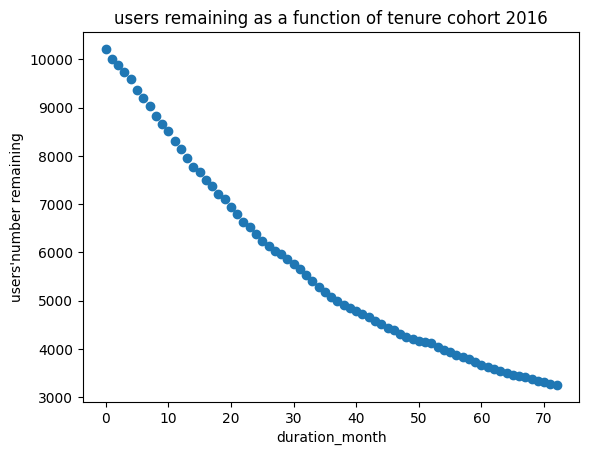

In [18]:
plt.scatter(duration1.index[:-1],z1)
plt.xlabel('duration_month')
plt.ylabel("users'number remaining")
plt.title('users remaining as a function of tenure cohort 2016')

# B- for the cohort 2017-01

In [19]:
x2 = C2
y = x2["cum_sum"]= x2.cumsum() 
z = 9548- y 
z2 = z[:-1]
z2

cancel_year_month
2017-01    9312
2017-02    9104
2017-03    8952
2017-04    8836
2017-05    8694
           ... 
2021-09    3436
2021-10    3401
2021-11    3363
2021-12    3327
2022-01    3312
Name: offer, Length: 61, dtype: int64

In [20]:
duration2 = data2.groupby(['duration_month']).count()
duration2

,acquisition_channel,cancel_year_month,fiber_or_adsl,has_retention,offer,recruit_year_month,sub_offer,total_bill
duration_month,,,,,,,,
0,236,236,236,236,236,236,236,236
1,208,208,208,208,208,208,208,208
2,152,152,152,152,152,152,152,152
3,116,116,116,116,116,116,116,116
4,142,142,142,142,142,142,142,142
...,...,...,...,...,...,...,...,...
57,35,35,35,35,35,35,35,35
58,38,38,38,38,38,38,38,38
59,36,36,36,36,36,36,36,36


Text(0.5, 1.0, 'users remaining as a function of tenure cohort 2017')

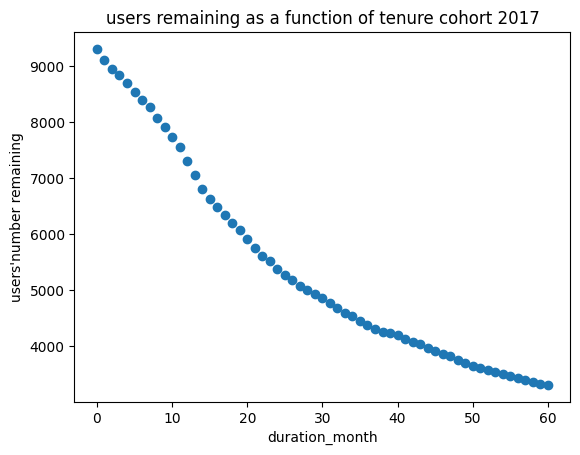

In [21]:
plt.scatter(duration2.index[:-1],z2,label=(duration2.index,))
plt.xlabel('duration_month')
plt.ylabel("users'number remaining")
plt.title('users remaining as a function of tenure cohort 2017')

# Any difference between user groups ?

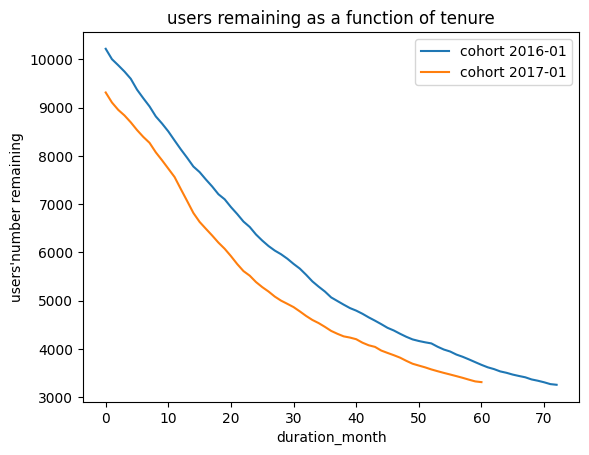

In [22]:
plt.subplot()
plt.plot(duration1.index[:-1],z1)
plt.plot(duration2.index[:-1],z2)
plt.xlabel('duration_month')
plt.ylabel("users'number remaining")
plt.legend(['cohort 2016-01','cohort 2017-01'])
plt.title('users remaining as a function of tenure')
plt.show()

We can see that the number of remaining users decreases at almost the same rate in both groups

# 3- Compute the monthly churn rate

In [23]:
w = 100*x1/z1
w1 = w[:-2]
w2 = 100*x2/z2
w2 = w2[:-2]

# A- Pour le cohort 2016-01

In [24]:
w1

cancel_year_month
2016-01    2.300088
2016-02    2.159784
2016-03    1.265695
2016-04    1.344279
2016-05     1.55273
             ...   
2021-09    1.306413
2021-10    0.808141
2021-11     0.96706
2021-12    1.161724
2022-01    0.429843
Name: offer, Length: 73, dtype: object

In [25]:
print('the monthly churn rate :',w1.mean(),'%')

the monthly churn rate : 1.6113346993114577 %


# B- Pour le cohort 2017-01

In [26]:
w2

cancel_year_month
2017-01    2.534364
2017-02     2.28471
2017-03    1.697945
2017-04    1.312811
2017-05     1.63331
             ...   
2021-09    0.989523
2021-10    1.029109
2021-11    1.129944
2021-12    1.082056
2022-01    0.452899
Name: offer, Length: 61, dtype: object

In [27]:
print('the monthly churn rate :',w2.mean(),'%')

the monthly churn rate : 1.7531458291715822 %


We note that the monthly churn rate of the 2016 cohort is lower than that of the 2017 cohort, while the average monthly churn rate of the 2017 cohort is higher. This is because the number of users in the 2016 cohort is greater, but also because they are older and therefore more likely to be loyal to the company.

# Bills

# What's the average total bill?

In [28]:
total_bill = data['total_bill'].mean()
print('Avarage total bill :',total_bill)

Avarage total bill : 1612.2015


In [29]:
total_bill1 = data1['total_bill'].mean()
total_bill2 = data2['total_bill'].mean()
print('Avarage total bill for cohort 2016-01 :',total_bill1)
print('Avarage total bill for cohort 2017-01 :',total_bill2)

Avarage total bill for cohort 2016-01 : 1749.5264064293915
Avarage total bill for cohort 2017-01 : 1461.8747381650608


We can see that the average total bill for the 2016 cohort is higher than that for 2017.

# Evolution with tenure

# cohort 2016

In [30]:
A = data1.groupby(['duration_month','total_bill']).count()
A

acquisition_channel  cancel_year_month  \
duration_month total_bill                                           
0              0                           217                217   
               50                           15                 15   
               80                            1                  1   
               100                           1                  1   
               190                           1                  1   
...                                        ...                ...   
N/A            10470                         1                  1   
               11860                         1                  1   
               14770                         1                  1   
               26830                         1                  1   
               28150                         1                  1   

                           fiber_or_adsl  has_retention  offer  \
duration_month total_bill                                        
0              0                     217            217    217   
               50                     15             15     15   
               80                      1              1      1   
               100                     1              1      1   
               190                     1              1      1   
...                                  ...            ...    ...   
N/A            10470                   1              1      1   
               11860                   1              1      1   
               14770                   1              1      1   
               26830                   1              1      1   
               28150                   1              1      1   

                           recruit_year_month  sub_offer  
duration_month total_bill                                 
0              0                          217        217  
               50                          15         15  
               80                           1          1  
               100                          1          1  
               190                          1          1  
...                                       ...        ...  
N/A            10470                        1          1  
               11860                        1          1  
               14770                        1          1  
               26830                        1          1  
               28150                        1          1  

[3982 rows x 7 columns]

# cohort 2017

In [31]:
B = data2.groupby(['duration_month','total_bill']).count()
B 

acquisition_channel  cancel_year_month  \
duration_month total_bill                                           
0              0                           203                203   
               10                            1                  1   
               20                            1                  1   
               50                           28                 28   
               70                            2                  2   
...                                        ...                ...   
N/A            5980                          1                  1   
               6010                          1                  1   
               6200                          1                  1   
               6480                          1                  1   
               43150                         1                  1   

                           fiber_or_adsl  has_retention  offer  \
duration_month total_bill                                        
0              0                     203            203    203   
               10                      1              1      1   
               20                      1              1      1   
               50                     28             28     28   
               70                      2              2      2   
...                                  ...            ...    ...   
N/A            5980                    1              1      1   
               6010                    1              1      1   
               6200                    1              1      1   
               6480                    1              1      1   
               43150                   1              1      1   

                           recruit_year_month  sub_offer  
duration_month total_bill                                 
0              0                          203        203  
               10                           1          1  
               20                           1          1  
               50                          28         28  
               70                           2          2  
...                                       ...        ...  
N/A            5980                         1          1  
               6010                         1          1  
               6200                         1          1  
               6480                         1          1  
               43150                        1          1  

[3164 rows x 7 columns]

# Complementary analyses

# Can you craft an algorithm to predict which users are going to churn ? 

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR

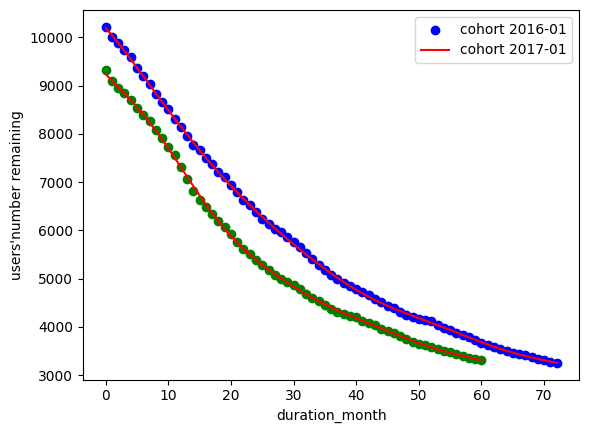

In [33]:
def predict(X,z,c):
    model = SVR(C=100000)
    model.fit(X,z)
    model.score(X,z)
    predictions = model.predict(X)
    plt.scatter(X,z,c=c)
    plt.xlabel('duration_month')
    plt.ylabel("users'number remaining")
    plt.plot(X,predictions, c='r')
    plt.legend([f'cohort 2016-01','cohort 2017-01'])
plt.show()
X = duration1.index[:-1].to_numpy().reshape(73,1)
Y = duration2.index[:-1].to_numpy().reshape(61,1)
predict(X,z1,'blue')
predict(Y,z2,'green')

# Business Purposes

We can use the model to identify customers at risk of churn and target them with marketing campaigns designed to encourage them to remain loyal to the company. We can also identify the factors that lead to churn and develop new products and services designed to address these factors.
In addition, we can use the model to optimise pricing strategies by identifying customers who are sensitive to price changes.

# Thank